In [8]:
import os
import sys
import atomium
sys.path.append('..')
import parse as pa
import feature as ft
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch as th

In [2]:
PATH_DF="/home/users/kkaminski/DL/DL_master_branch/deepligand/graphs/cofdata_core_openmm_v12_20200717.p"
data = pd.read_pickle(PATH_DF)

In [4]:
def fn_stack(pdb, t):
    r1 = pa.read_pdb_full(pdb)
    r2 = ft.calc_struct_properties(*r1, t)
    embedding = ft.edge_embedding_to_3d_tensor(*r2)
    return embedding


In [9]:
def fn_base(pdb, t):
    r1 = pa.read_pdb_full(pdb)
    ca_xyz = th.from_numpy(r1[-2])
    return th.cdist(ca_xyz, ca_xyz)

In [5]:
pdb1 = 'data/1a4i_A.pdb'
pdb2 = 'data/1a5z_A.pdb'

In [6]:
emb1 = fn_stack(pdb1, 9).float()
emb2 = fn_stack(pdb2, 9).float()

In [7]:
emb1 = emb1.unsqueeze(3).unsqueeze(4)
emb2 = emb2.swapdims(0,-1).unsqueeze(0).unsqueeze(0)
kernel = emb1 * emb2

RuntimeError: [enforce fail at CPUAllocator.cpp:68] . DefaultCPUAllocator: can't allocate memory: you tried to allocate 300457123200 bytes. Error code 12 (Cannot allocate memory)

ValueError: Must pass 2-d input. shape=(285, 285, 19, 1, 1)

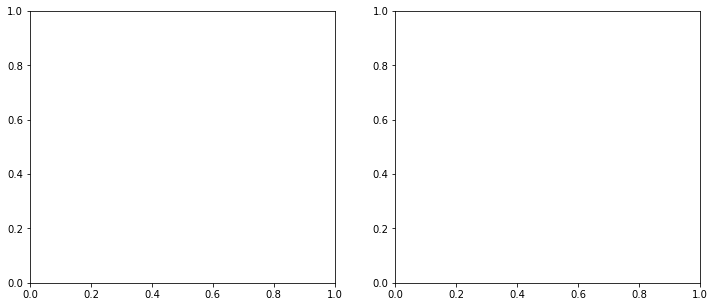

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax1 = sns.heatmap(emb1, ax=ax[0])
ax2 = sns.heatmap(emb2, ax=ax[1])
ax1.set_title(pdb1)
ax2.set_title(pdb2)


In [ ]:
cad1 = cadist1[:, :, None, None, None]
cad2 = cadist2[None, None, None, :, :]

In [ ]:
density = cad1 * cad2

In [ ]:

density2d = density.sum((2,3,4))

<AxesSubplot:>

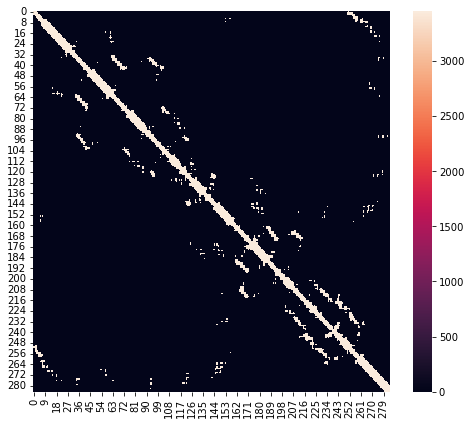

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
sns.heatmap(density2d, ax=ax)